# Detecção De Câncer Maligno

Nesse projeto vou utilizar o dataset Breast cancer wisconsin (diagnostic) do scikit-learn (https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset).

O nosso objetivo é criar uma máquina preditiva que diga se o câncer é maligno ou benigno a partir dos dados informados.

Claramente temos um problema de classificação, logo, vamos usar modelos e métricas de classificação para esse projeto.

## Variáveis

a) raio (média das distâncias do centro aos pontos do perímetro)

b) textura (desvio padrão dos valores de escala de cinza)

c) perímetro

d) área

e) suavidade (variação local nos comprimentos dos raios)

f) compacidade (perímetro^2 / área - 1,0)

g) concavidade (gravidade das porções côncavas do contorno)

h) pontos côncavos (número de porções côncavas do contorno)

e) simetria

j) dimensão fractal ("aproximação do litoral" - 1)

O atributo diagnóstico pode ser lido como: (0-tumor maligno, 1 tumor benigno)

# Carregamento dos Dados

In [1]:
# bibliotecas 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

# scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
# Cria o dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=[data.feature_names])

# Vizualização dos Dados

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   (mean radius,)              569 non-null    float64
 1   (mean texture,)             569 non-null    float64
 2   (mean perimeter,)           569 non-null    float64
 3   (mean area,)                569 non-null    float64
 4   (mean smoothness,)          569 non-null    float64
 5   (mean compactness,)         569 non-null    float64
 6   (mean concavity,)           569 non-null    float64
 7   (mean concave points,)      569 non-null    float64
 8   (mean symmetry,)            569 non-null    float64
 9   (mean fractal dimension,)   569 non-null    float64
 10  (radius error,)             569 non-null    float64
 11  (texture error,)            569 non-null    float64
 12  (perimeter error,)          569 non-null    float64
 13  (area error,)               569 non

In [5]:
df.shape

(569, 30)

Como nosso modelo é supervisionado, precisamos incluir a variável target no dataset.

In [6]:
df['diagnostico'] = data.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnostico
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   (mean radius,)              569 non-null    float64
 1   (mean texture,)             569 non-null    float64
 2   (mean perimeter,)           569 non-null    float64
 3   (mean area,)                569 non-null    float64
 4   (mean smoothness,)          569 non-null    float64
 5   (mean compactness,)         569 non-null    float64
 6   (mean concavity,)           569 non-null    float64
 7   (mean concave points,)      569 non-null    float64
 8   (mean symmetry,)            569 non-null    float64
 9   (mean fractal dimension,)   569 non-null    float64
 10  (radius error,)             569 non-null    float64
 11  (texture error,)            569 non-null    float64
 12  (perimeter error,)          569 non-null    float64
 13  (area error,)               569 non

In [8]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
diagnostico                0
dtype: int64

Não temos nunhum valor faltante em nossa base de dados!

# Resumo Estatístico

In [9]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnostico
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


Como não temos variáveis categóricas, não precisamos verificar as suas descrições.

# Exploratory Data Analysis (EDA)

Começaremos verificando a quantidade de cada tumor.

In [10]:
df['diagnostico'].value_counts()

(diagnostico,)
1                 357
0                 212
dtype: int64

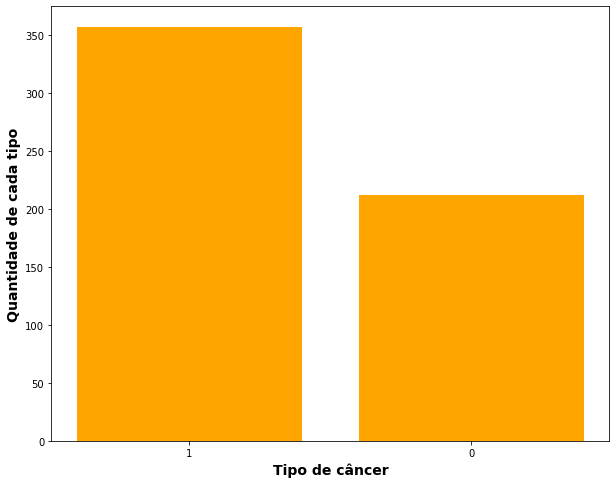

In [11]:
plt.figure(figsize=[10,8])
plt.xlabel("Tipo de câncer", fontsize=14, fontweight = 'bold')
plt.ylabel("Quantidade de cada tipo", fontsize=14, fontweight = 'bold')
plt.bar(['1', '0'], df.diagnostico.value_counts(), color = 'orange')
plt.show()

Vemos que temos uma maior quantidade de câncer benigno, mas, apesar disso, a base de dados parece estar balanceada. Vamos verificar as proporções de cada tipo de câncer.

In [12]:
df.diagnostico.value_counts() / df.shape[0] 

(diagnostico,)
1                 0.627417
0                 0.372583
dtype: float64

Podemos ver que temos $60$% de casos benignos e $40$% malignos. Agora, veremos se existe alguma correlação entre as variáveis.

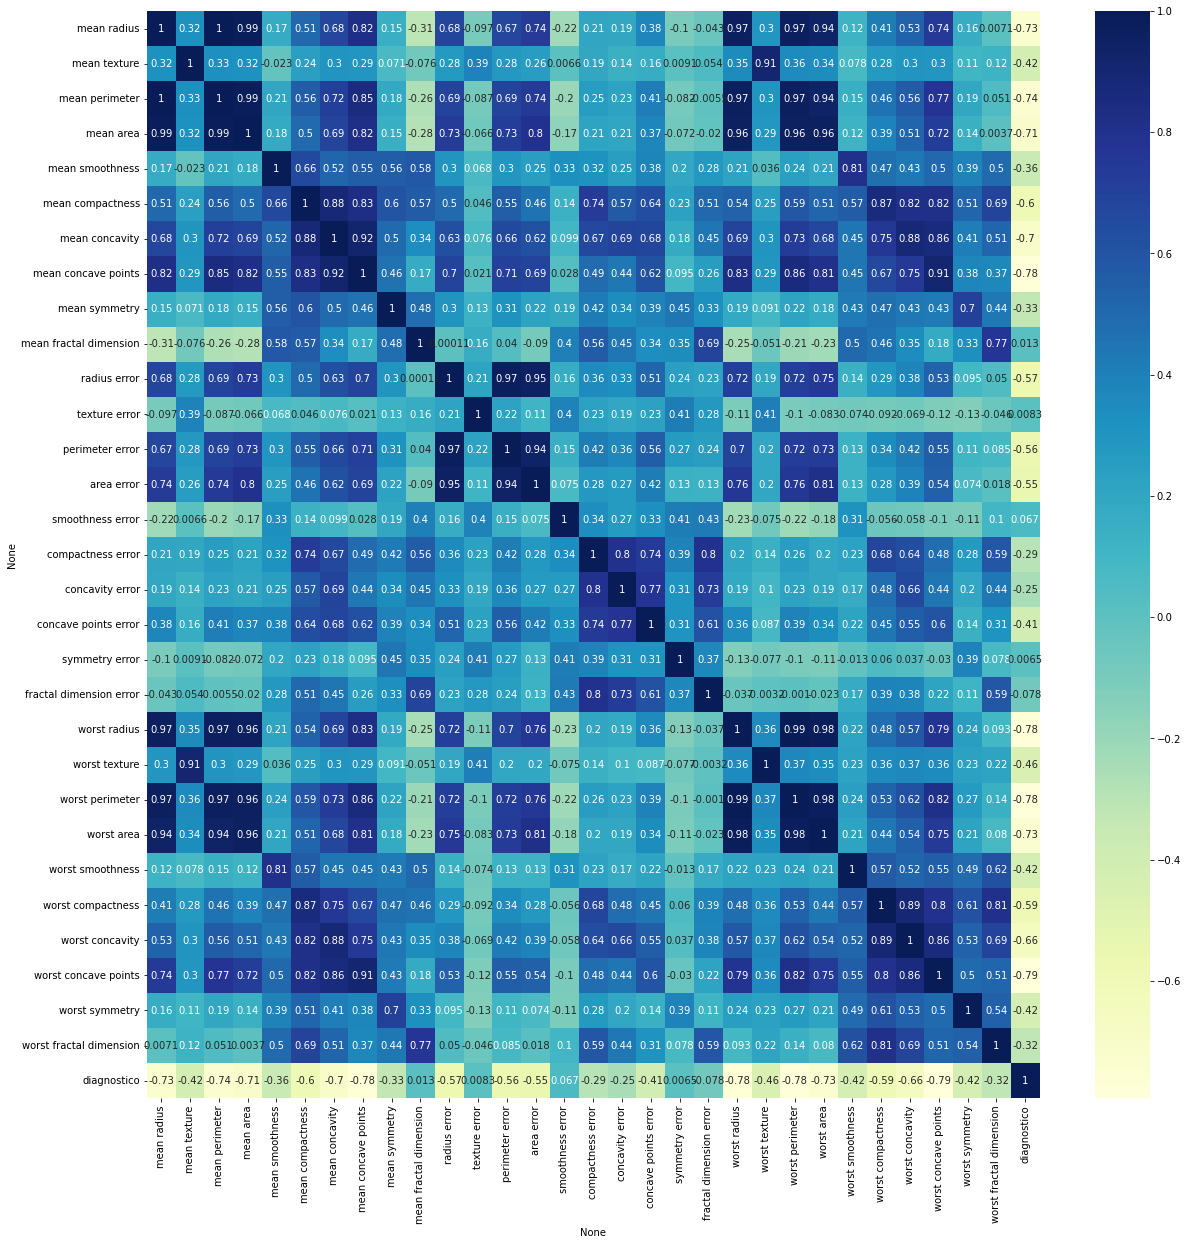

In [13]:
plt.figure(figsize=[20,20])
dataplot = sns.heatmap(df.corr(),cmap="YlGnBu", annot=True)

Aqui as correlações negativas são correlações entre o câncer maligno com a variável. Temos algumas correlações fortes aqui:

- Maligno:
    * raio
    * perimetro
    * área
    * suavidade
- Benigno:
    * Não tivemos correlações fortes

# Teste de Modelos 

Primeiro vamos dividir os dados em treino e teste.

In [14]:
X = df.drop(columns='diagnostico')
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [15]:
y = df.diagnostico
y

,diagnostico
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [16]:
X.shape, y.shape

((569, 30), (569, 1))

# Regressão Logística 

In [32]:
kf = KFold(n_splits=30)

In [33]:
modelo = LogisticRegression(tol=0.9, max_iter=200)

In [34]:
score_treino = cross_val_score(modelo, X, y, cv=kf, scoring='accuracy')
print('Acurácia do modelo:', score_treino.mean())

Acurácia do modelo: 0.9508771929824562


O nosso modelo teve obteve 95% de acertos, isso é muito bom. 

# SVM

In [35]:
modelo = SVC(C=0.9, gamma=0.001)

In [37]:
score_treino = cross_val_score(modelo, X, y, cv=kf, scoring='accuracy')
print('Acurácia do modelo:', score_treino.mean())

Acurácia do modelo: 0.9245614035087718


Já no modelo SVM, tivemos uma porcentagem menor de acertos, mas ainda muito boa.

# KNN

In [38]:
modelo = KNeighborsClassifier(n_neighbors=10, leaf_size=30)

In [39]:
score_treino = cross_val_score(modelo, X, y, scoring='accuracy')
print('Acurácia de treino:', score_treino.mean())

Acurácia de treino: 0.9314702685918336


Tivemos uma quatidade de acertos igual a 93%.

# Conclusão

Após os testes dos modelos, vimos que o modelo com a melhor precisão foi a regressão logística com 94% de eficacia. Num segundo estudo podemos fazer uma engenharia de vrarávei para ver a performace dos modelos e conseguir algum com uma eficência melhor, mas para uma primeira abordagem já está muito bom. 

Não tinhamos muitas analises que podiamos fazer e não precisamos mexer muito no dataset já que ele veio praticamente pronto. 
Para próximos estudos podemos fazer um webscreping e fazeer analises mais sofisticadas. 